## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore') 

from nltk.corpus import stopwords

from textblob import Word

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/usr/local/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning

In [2]:
FILENAME = 'DataSarkasme.csv'
VECTORIZER_NAME = 'vectorizer.pkl'
MODEL_NAME = 'sarcasm.pkl'
# FILENAME = 'DataSarkasmeWithSong.csv'
# VECTORIZER_NAME = 'vectorizer_with_song.pkl'
# MODEL_NAME = 'sarcasm_with_song.pkl'
data = pd.read_csv(FILENAME, error_bad_lines=False, names=['text', 'label'], header=None, sep=';')

In [3]:
print(data.shape)

(500, 2)


In [4]:
import sklearn
print('The nltk version is {}.'.format(sklearn.__version__))

The nltk version is 0.20.0.


In [5]:
data.head(10)

,text,label
0,"Kalau saya menjadi kakaknya, saya tidak mau me...",1
1,Apakah kamu mau punya tetangga yang sangat kum...,1
2,Kamu orang yang tidak tahu terimakasih di ruma...,1
3,"Aku sangat kecewa denganmu, aku sudah menganga...",1
4,"Jangan mimpi kamu akan jadi suami dia, kamu ti...",1
5,Percuma kamu di sekolahkan kalo ucapanmu tetap...,1
6,"Percuma saja Kamu ikut lomba lari, lihatlah ba...",1
7,"Aku tidak bisa berdekatan dengan kamu, karena ...",1
8,Apa Kamu tidak punya pikiran? Lihat istri dan ...,1
9,"Dia sungguh tidak punya malu sama sekali, suda...",1


In [6]:
data.label.value_counts()

0    264
1    236
Name: label, dtype: int64

## Preprocessing

In [7]:
df=data.copy()

In [8]:
def clean_data(df):
    # Lower all characters
    df.text=df.text.apply(lambda sen: ' '.join(word.lower() for word in sen.split()))
    # Remove symbols
    df.text=df.text.apply(lambda sen: ''.join([word for word in sen if word.isalnum() or word==' ']))
    # Remove digits
    df.text=df.text.str.replace('\d', '')
    # Remove stop words
    #sw=stopwords.words('english')
    #df.text=df.text.apply(lambda sen: ' '.join([word for word in sen.split() if word not in sw]))
    return df

In [9]:
df=clean_data(df)

In [10]:
df

,text,label
0,kalau saya menjadi kakaknya saya tidak mau men...,1
1,apakah kamu mau punya tetangga yang sangat kum...,1
2,kamu orang yang tidak tahu terimakasih di ruma...,1
3,aku sangat kecewa denganmu aku sudah mengangap...,1
4,jangan mimpi kamu akan jadi suami dia kamu tid...,1
...,...,...
495,pak guru mengizinkan anakanak untuk menggunaka...,0
496,bina sudah memaafkan kesalahan arif,0
497,vino memasak nasi goreng untuk sarapan,0
498,raden meminta ayah untuk membelikan sepeda unt...,0


In [11]:
# Low frequently used words
#all_words=pd.Series((' '.join(df.text.values)).split()).value_counts().tail(5000)

In [12]:
# Remove them
#df.text=df.text.apply(lambda sen: ' '.join(word for word in sen.split() if word not in all_words))

In [13]:
# Lemmatize words
#df.text=df.text.apply(lambda sen: ' '.join([Word(word).lemmatize() for word in sen.split()]))

In [14]:
df.head(10)

,text,label
0,kalau saya menjadi kakaknya saya tidak mau men...,1
1,apakah kamu mau punya tetangga yang sangat kum...,1
2,kamu orang yang tidak tahu terimakasih di ruma...,1
3,aku sangat kecewa denganmu aku sudah mengangap...,1
4,jangan mimpi kamu akan jadi suami dia kamu tid...,1
5,percuma kamu di sekolahkan kalo ucapanmu tetap...,1
6,percuma saja kamu ikut lomba lari lihatlah bad...,1
7,aku tidak bisa berdekatan dengan kamu karena k...,1
8,apa kamu tidak punya pikiran lihat istri dan a...,1
9,dia sungguh tidak punya malu sama sekali sudah...,1


In [15]:
data=df.copy()
df

,text,label
0,kalau saya menjadi kakaknya saya tidak mau men...,1
1,apakah kamu mau punya tetangga yang sangat kum...,1
2,kamu orang yang tidak tahu terimakasih di ruma...,1
3,aku sangat kecewa denganmu aku sudah mengangap...,1
4,jangan mimpi kamu akan jadi suami dia kamu tid...,1
...,...,...
495,pak guru mengizinkan anakanak untuk menggunaka...,0
496,bina sudah memaafkan kesalahan arif,0
497,vino memasak nasi goreng untuk sarapan,0
498,raden meminta ayah untuk membelikan sepeda unt...,0


In [16]:
df.reset_index()

,index,text,label
0,0,kalau saya menjadi kakaknya saya tidak mau men...,1
1,1,apakah kamu mau punya tetangga yang sangat kum...,1
2,2,kamu orang yang tidak tahu terimakasih di ruma...,1
3,3,aku sangat kecewa denganmu aku sudah mengangap...,1
4,4,jangan mimpi kamu akan jadi suami dia kamu tid...,1
...,...,...,...
495,495,pak guru mengizinkan anakanak untuk menggunaka...,0
496,496,bina sudah memaafkan kesalahan arif,0
497,497,vino memasak nasi goreng untuk sarapan,0
498,498,raden meminta ayah untuk membelikan sepeda unt...,0


In [17]:
T=df[['text']]
Y=df[['label']]

In [18]:
T.text

0      kalau saya menjadi kakaknya saya tidak mau men...
1      apakah kamu mau punya tetangga yang sangat kum...
2      kamu orang yang tidak tahu terimakasih di ruma...
3      aku sangat kecewa denganmu aku sudah mengangap...
4      jangan mimpi kamu akan jadi suami dia kamu tid...
                             ...                        
495    pak guru mengizinkan anakanak untuk menggunaka...
496                  bina sudah memaafkan kesalahan arif
497               vino memasak nasi goreng untuk sarapan
498    raden meminta ayah untuk membelikan sepeda unt...
499                    ibu memasak ikan tongkol di dapur
Name: text, Length: 500, dtype: object

In [19]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2))
X = vectorizer.fit_transform(T.text)

In [20]:
import joblib

joblib.dump(vectorizer.vocabulary_, VECTORIZER_NAME, compress=9)

['vectorizer.pkl']

In [21]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=12, stratify=Y)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1499: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1499: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, chec

In [22]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(400, 5606) (100, 5606) (400, 1) (100, 1)


In [23]:
print(Y_train.label.value_counts())

0    211
1    189
Name: label, dtype: int64


In [24]:
print(Y_test.label.value_counts())

0    53
1    47
Name: label, dtype: int64


In [25]:
stats = {}

## LinearSVC

In [26]:
svc=LinearSVC().fit(X_train, Y_train)
Y_pred=svc.predict(X_test)
acc_svc=round(accuracy_score(Y_pred, Y_test)*100, 2)
stats['LinearSVC']=acc_svc
print(f'Accuracy score: {acc_svc}%')

Accuracy score: 95.0%


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [27]:
svc2=SVC().fit(X_train, Y_train)
Y_pred2=svc2.predict(X_test)
acc_svc2=round(accuracy_score(Y_pred, Y_test)*100, 2)
stats['SVC']=acc_svc2
print(f'Accuracy score: {acc_svc2}%')

Accuracy score: 95.0%


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred2, labels=svc2.classes_)

array([[53,  0],
       [47,  0]])

In [29]:

joblib.dump(svc2, MODEL_NAME, compress=9)

['sarcasm.pkl']

In [30]:
stats

{'LinearSVC': 95.0, 'SVC': 95.0}

In [31]:
results=pd.Series(stats)
results

LinearSVC    95.0
SVC          95.0
dtype: float64

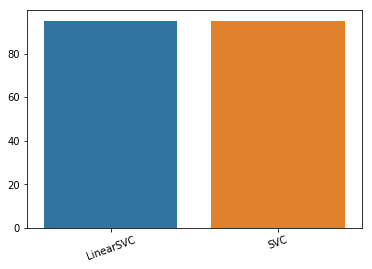

In [32]:
sns.barplot(results.index, results.values)
plt.xticks(rotation=20)
plt.show()

## Demo

In [33]:
text =  'aku tak mau selain cuma kamu\ndalam hatiku yang ada cuma kamu\nyang aku mau tak lain cuma kamu\nhanyalah kamu satu cuma kamu\naku mau cuma kamu, cuma kamu\naku mau cuma kamu, cuma kamu\naku mau cuma kamu, cuma kamu\naku mau cuma kamu, cuma kamu\naku memang cantik dan bodiku yang paling seksi\nlihatlah sekujur tubuhku meliuk-liuk\njika ku goyang kau hanya boleh melihat\nkau boleh lihat tapi jangan coba mendekat\ncinta ini sudah ada yang isi\ndan tak mungkin berpaling ke lain hati\ncuma kamu yang ku mau\ndan tak pernah selain kamu\nkau lihat senyumanku dan goyangan pinggulku\nseksi bodiku ini kan cuma buat kamu\naku mau cuma kamu, cuma kamu\naku mau cuma kamu, cuma kamu\naku mau cuma kamu, cuma kamu\naku mau cuma kamu, cuma kamu\nkala ku pandang kerlip bintang jauh di sana\ngantengnya kamu membuat aku terpesona\ntapi sejak awal ku cuma main gila\ndan akhirnya kini ku jatuh cinta\nwalau ku tahu kau sudah ada yang punya\ntapi gak takut namanya juga menggoda\naku tak mau selain cuma kamu\ndalam hatiku yang ada cuma kamu\nyang aku mau tak lain cuma kamu\nhanyalah kamu satu cuma kamu\naku tak mau kalau aku dimadu\naku mau cuma kamu, cuma kamu\naku mau cuma kamu, cuma kamu\naku mau cuma kamu, cuma kamu\naku mau cuma kamu, cuma kamu\naku mau cuma kamu, cuma kamu\naku mau cuma kamu, cuma kamu\naku mau cuma kamu, cuma kamu\naku mau cuma kamu, cuma kamu\n'
df_demo = pd.DataFrame({'text':[text]})
df_demo=clean_data(df_demo)

In [34]:
sarcasm = joblib.load(MODEL_NAME)
vector = CountVectorizer(decode_error="replace", vocabulary=joblib.load(VECTORIZER_NAME))

X = vector.fit_transform(df_demo.text)
result = sarcasm.predict(X)
result[0]

1

In [35]:
text = "terasakan bagai mekar terbit asmara\nmerangkai cita harap pujiku memanja\nufuk surya seakan membias salam\nlewat sang alam, bak dilukiskan kalam\nterayun langkahku mengiring ayun langkahmu\nsenada searah melambung tinggi impian\nkilau emas jangankan kami kan hirau\njangankan silau pun terpukau\nreff.\ndadadadada......\nterhampar mekar mawar kugapai kau menjuntai\nmengoyak nestapa kukini t'lah terbuai\nsemaraknya hati tak usai beranjak\npun tak ku campak cerahkan nampak kelak\nasmaraku asmaramu membara sempurna\nmanjanya tawa melukis manisnya warna\nbahagiaku bahagiamu telah menjelma\ndunia bak milik berdua\n"
df_demo = pd.DataFrame({'text':[text]})
df_demo=clean_data(df_demo)

In [36]:
X = vector.fit_transform(df_demo.text)
result = sarcasm.predict(X)
result[0]

0